<h2>Business Statement</h2>

The Business Statement is as follows -

One of the Entertainment company is wants to purchase the rights of comic series named Rick and Morty. However, they are unsure about the popularity and reviews of it. Hence they decided to perform Sentiment Analysis of a Reddit Thread. The pre trained analyser used are Vader and Textblob

In [1]:
import re

import pandas as pd
import nltk

Importing the file CommentsRick.csv which was generated by using our RedditAPI. The code for that is written in RedditAPI.ipynb file

In [4]:
comments = pd.read_csv(r'C:\Users\Siddharth Tripathi\Desktop\DataScience_Pranjal\Kaggle_assessment\RNN_Sentiment\CommentsRick.csv')

# Sentiment analysis 
1. Using prebuilt packages
    - Data cleaning and exploration
    - Vader and Textblob  </br>


## __1.__ __Using prebuilt packages__

 - ### __Data cleaning and exploration__

In [5]:
sample = comments.Reply.iloc[10]
sample

'Wait for real?'

In [6]:
re.sub(r'\(?http\S+', '', sample)

'Wait for real?'

Getting rid of \n, \t... etc characters that does not help with prediction but might link 2 words together and make them indistinguishable from one another

In [7]:
sample = comments.Reply.iloc[9]
sample

'Say wa'

In [8]:
word_tokenized = nltk.word_tokenize(sample)
word_tokenized

['Say', 'wa']

In [9]:
' '.join(word_tokenized)

'Say wa'

#### Bigrams

In [10]:
sample = ['more', 'is', 'said', 'than', 'done', 'is', 'said', 'than']

In [11]:
from nltk.collocations import *

bigram_measures = nltk.collocations.BigramAssocMeasures()

finder = BigramCollocationFinder.from_words(sample)

# only bigrams that appear 2+ times
finder.apply_freq_filter(2) 

# return the 10 n-grams with the highest PMI
print (finder.nbest(bigram_measures.pmi, 10) )

[('is', 'said'), ('said', 'than')]


Let's try it on first 10000 rows of our text

In [12]:
all_text = comments.iloc[:10000,:].Reply.str.cat(sep='. ')

In [13]:
all_text = nltk.word_tokenize(all_text)

In [14]:
def common_bigrams(tokenized_text, min_freq, top_n):
    bigram_measures = nltk.collocations.BigramAssocMeasures()
    finder = BigramCollocationFinder.from_words(tokenized_text)
    finder.apply_freq_filter(min_freq) 
    finder.nbest(bigram_measures.pmi, top_n)
    return finder.nbest(bigram_measures.pmi, top_n)

print(common_bigrams(all_text, 10, 10))

[('Yo-hohoho', 'Yo-ho-ho-ho'), ('herd', 'immunity'), ('Yo-ho-ho-ho', 'Yo-hohoho'), ('Justin', 'Roiland'), ('Adult', 'Swim'), ('South', 'Park'), ('**1', 'day**'), ('THIS', 'LINK**'), ('Wubba', 'lubba'), ('minimum', 'wage')]


#### Wordcloud

In [15]:
import wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

sample = comments.iloc[:10000,:].Reply.str.cat(sep='. ')

In [16]:
import random
def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(1, 20)

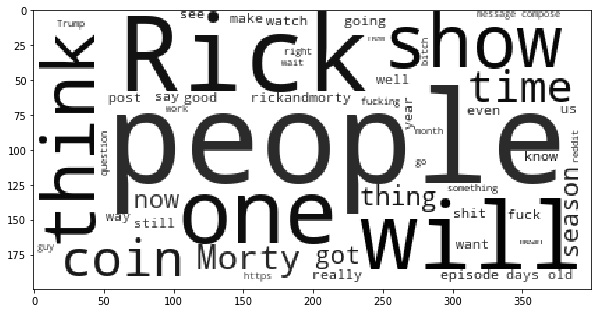

In [17]:
stp = STOPWORDS.copy()
wc = WordCloud(background_color="white", max_words=50,  stopwords=stp)
# generate word cloud
wc.generate(sample)

plt.figure(figsize=(10,20))
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3))
plt.show()

- ### __Vader and Textblob__

Vader package first

In [19]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#FIRST, we initialize VADER so we can use it within our Python script
sid = SentimentIntensityAnalyzer()

We can add sentiment scores to words manually if we want

In [20]:
new_words = {
    'hello': -1000,
}

sid.lexicon.update(new_words)

In [21]:
sid.polarity_scores('hello there')

{'neg': 0.999, 'neu': 0.001, 'pos': 0.0, 'compound': -1.0}

In [22]:
#As this is for demonstration purposes only - instead of doing the scoring over 200,000+ rows, we will use a subset
df = comments[comments.Key<101]
df.shape

(70539, 4)

In [24]:
#The cleaning steps as outlined earlier
df.Reply = df.Reply.apply(str)
df.Reply = df.Reply.apply(lambda x: re.sub(r'\(?http\S+', '', x))
df.Reply = df.Reply.apply(lambda x: ' '.join(nltk.word_tokenize(x)))

C:\Users\Siddharth Tripathi\Anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [25]:
df[['neg','neu','pos','compound']] = df.Reply.apply(lambda x: pd.Series(sid.polarity_scores(x)))

C:\Users\Siddharth Tripathi\Anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [26]:
df.head(3)

,Reply,Upvote,Time,Key,neg,neu,pos,compound
0,"For those out of the loop , people who have co...",4227,2019-12-20 05:54:14,1,0.0,1.0,0.0,0.0
1,I ’ m out !,192,2019-12-20 05:23:04,1,0.0,1.0,0.0,0.0
2,Wait we get coins for upvoting ?,205,2019-12-20 06:10:29,1,0.0,1.0,0.0,0.0


Textblob package now

In [28]:
!pip install textblob

In [29]:
from textblob.sentiments import NaiveBayesAnalyzer, PatternAnalyzer
from textblob import Blobber
tba = Blobber(analyzer=NaiveBayesAnalyzer())

In [30]:
tba('My life is a frictionless slide downhill').sentiment

Sentiment(classification='neg', p_pos=0.374939442175929, p_neg=0.6250605578240714)

In [31]:
#As this is for demonstration purposes only - we will only use a subset
df = comments[comments.Key<101]

In [34]:
#The cleaning steps as outlined earlier
df.Reply = df.Reply.apply(str)
df.Reply = df.Reply.apply(lambda x: re.sub(r'\(?http\S+', '', x))
df.Reply = df.Reply.apply(lambda x: ' '.join(nltk.word_tokenize(x)))

C:\Users\Siddharth Tripathi\Anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [35]:
df[['Classification','positive','negative']] = df.Reply.apply(lambda x: pd.Series({'Classification':tba(x).sentiment[0],
                                                                        'positive':tba(x).sentiment[1],
                                                                        'negative':tba(x).sentiment[2]}))

C:\Users\Siddharth Tripathi\Anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [36]:
df.head(3)

,Reply,Upvote,Time,Key,Classification,positive,negative
0,"For those out of the loop , people who have co...",4227,2019-12-20 05:54:14,1,pos,0.729501,0.270499
1,I ’ m out !,192,2019-12-20 05:23:04,1,neg,0.482792,0.517208
2,Wait we get coins for upvoting ?,205,2019-12-20 06:10:29,1,pos,0.635074,0.364926


In [37]:
Mood = df['Classification'].value_counts()

Text(0.5, 1.0, 'Mood Distribution')

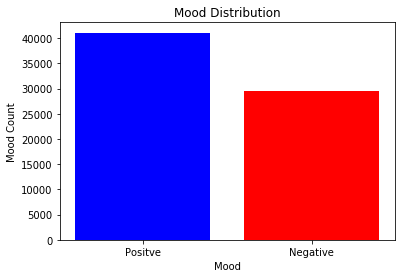

In [41]:
import matplotlib.pyplot as plt

index = [1,2]
plt.bar(index,Mood,color=['b','r'])
plt.xticks(index,['Positve','Negative'])
plt.xlabel('Mood')
plt.ylabel('Mood Count')
plt.title('Mood Distribution')

From the above graphical visualization, we can see that Mood distribution of people for Rick and Morty comic series is as follows -

<h4>Observation</h4>
More than 40000 people have given positive reviews to the comic series

While people who have given negative comments is slightly less than 30000

<h4>Evaluation</h4>

It is evident that people with positive comments are higher than those with negative comments.
Secondly, this is series is with age restriction (abusive comedy). Therefore there is a high probability of many negative comments actualy positive in sentiment but with bad language.

<h4>Result</h4>

Based on sentiment analysis it can be said the comic series is having higher positive comments than negative and it can be said that the series has positive sentiments and popularity.

